### Advanced concepts for very high efficiency photovoltaic conversion

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import scipy.interpolate, scipy.integrate, pandas, sys
import scipy.constants as constants
from scipy.optimize import fmin
from scipy import constants as sc
import photon_in
import SC
from savePlot import setLayout,savePlot

In [7]:
# define the necessary variables for figures layout

# xaxis
listEg1 = np.arange(0.5, 2.51, 0.05)

# figure size (in inches)
figSize = (6.8,5.2)

# dictionnary of layout
dictPlotParams = {
    "fontsize":16,
    "fontsize_lbl":20,
    "fontsize_lgd":12,
    "fontsize_title":16,
    "fontsize_source":12,
    "xticks_rotation":30
}

# folder to save the figures (TO BE SUPPRESSED ONCE ALL THE FIGURES ARE WELL EDITED)
foldSaveFig = 'C:/Users/thomas.vezin/Documents/These/6-Papiers/4-ISTE/figures/'

## Step 1 - Define the solar spectrum using Planck's law

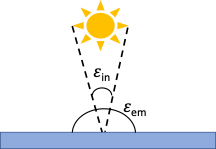

In [4]:
Tsun = 5800.  # sun temperature [K]
Tamb = 300.  # ambient temperature  [K]
SolarAngle  = 32 / 60 * np.pi / 180
eps_in = np.pi * (np.sin(SolarAngle  / 2)) ** 2
eps_em = np.pi

## 1) Modèle Shockley-Queisser

In [32]:
PCE_lost = SC.Shockley_Quesseir(listEg1, Tamb, Tsun, eps_in, eps_em)

Maximum efficiency=  30.5 %


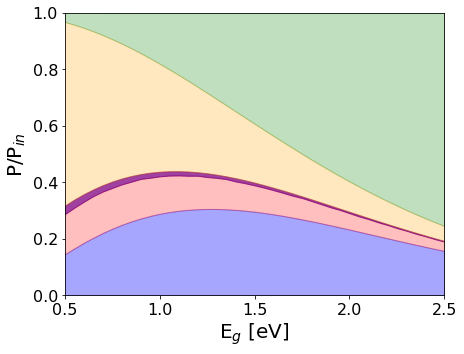

In [33]:
filename = '0-shockley-queisser'
fig, ax = plt.subplots(figsize=figSize)
#plt.subplots_adjust(left=0.2)
xLabel = 'E$_g$ [eV]'
yLabel = 'P/P$_{in}$'
ax.fill_between(listEg1, PCE_lost[0], 0, color='blue', alpha=0.350)
ax.fill_between(listEg1,  PCE_lost[1], PCE_lost[0], color='red', alpha=0.25)
ax.fill_between(listEg1,  PCE_lost[2], PCE_lost[1], color='purple', alpha=0.75)
ax.fill_between(listEg1,  PCE_lost[3], PCE_lost[2], color='orange', alpha=0.25)
ax.fill_between(listEg1,  PCE_lost[4],  PCE_lost[3], color='green', alpha=0.25)
ax.set_ylim(0, 1.)
ax.set_xlim(0.5, 2.5)

setLayout(dictPlotParams,xLabel=xLabel,yLabel=yLabel)

savePlot(foldSaveFig,filename)

print('Maximum efficiency= ', round(np.amax(PCE_lost[0]) *100,1),'%')

## 2) Cellules à porteurs chauds

In [38]:
Th = 3000.
Tamb = 300.

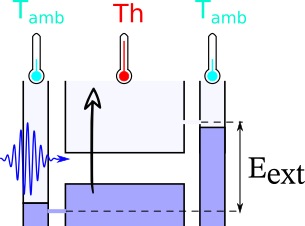

In [39]:
PCE_lost = SC.HCSS(listEg1, Tamb, Tsun, Th, eps_in, eps_em)

Maximum efficiency=  66.5 %


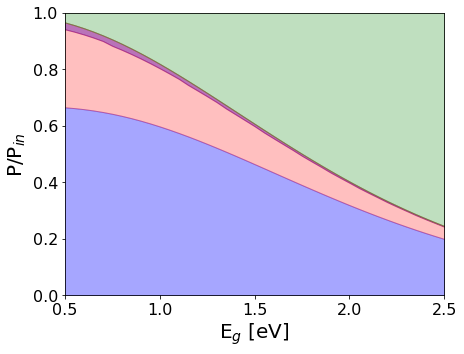

In [40]:
filename = '1-porteurs-chauds'
fig, ax = plt.subplots(figsize=figSize)
ax.fill_between(listEg1, PCE_lost[0], 0, color='blue', alpha=0.350, label ='Convertie')
ax.fill_between(listEg1,  PCE_lost[1], PCE_lost[0], color='red', alpha=0.25, label ='Perte de collecte')
ax.fill_between(listEg1,  PCE_lost[2], PCE_lost[1], color='purple', alpha=0.55, label ='Thermalisation')
ax.fill_between(listEg1,  PCE_lost[3], PCE_lost[2], color='orange', alpha=0.25, label ='Pertes radiatives')
ax.fill_between(listEg1,  PCE_lost[4], PCE_lost[3], color='green', alpha=0.25, label ='Photons non absorbés')
ax.set_ylim(0, 1.)
ax.set_xlim(0.5, 2.5)

setLayout(dictPlotParams,xLabel=xLabel,yLabel=yLabel)

savePlot(foldSaveFig,filename)

print('Maximum efficiency= ', round(np.amax(PCE_lost[0]) *100,1),'%')

## 3) Cellules à bande intermédaire

$P_{elec} = \Delta\mu_{CV}\left(  \left(J_{gen}^{CV} -J_{gen}^{CV}\right) + \left( \right) \right) $

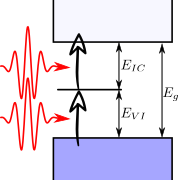

In [41]:
PCE_lost = np.array(pd.read_table("data/IBSC.csv", sep=',', header=0))

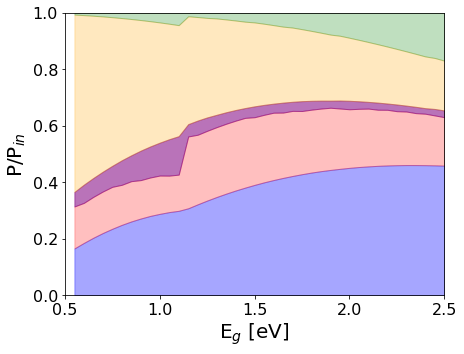

In [42]:
filename = '2-bande-intermediaire'
fig, ax = plt.subplots(figsize=figSize)
Col_lost = PCE_lost[:,1] + PCE_lost[:,5]
Rad_lost = Col_lost + PCE_lost[:,4]
Th_lost  = Rad_lost + PCE_lost[:,3]
Abs_lost = Th_lost + PCE_lost[:,2]
ax.fill_between(PCE_lost[:,0],  PCE_lost[:,1], 0, color='blue', alpha=0.350, label ='Convertie')
ax.fill_between(PCE_lost[:,0],  Col_lost, PCE_lost[:,1], color='red', alpha=0.25, label ='Collectée')
ax.fill_between(PCE_lost[:,0],  Rad_lost , Col_lost , color='purple', alpha=0.55, label ='Recombinée')
ax.fill_between(PCE_lost[:,0],  Th_lost , Rad_lost , color='orange', alpha=0.25, label ='Thermalisée')
ax.fill_between(PCE_lost[:,0],  Abs_lost, Th_lost, color='green', alpha=0.25, label ='Non absorbée')
ax.set_ylim(0, 1.)
ax.set_xlim(0.5, 2.5)

setLayout(dictPlotParams,xLabel=xLabel,yLabel=yLabel)

savePlot(foldSaveFig,filename)

### 4) Down conversion

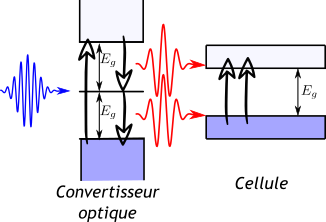

In [43]:
PCE_lost = np.array(pd.read_table("data/DownConv.csv", sep=',', header=0))

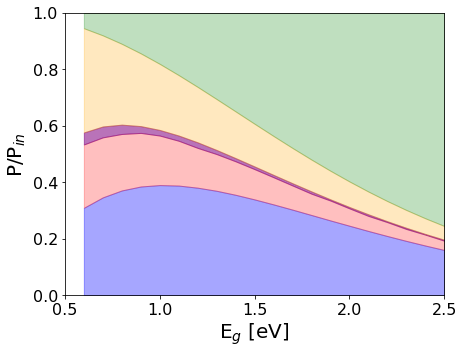

In [44]:
filename = '3-down-conversion'
fig, ax = plt.subplots(figsize=figSize)
Col_lost = PCE_lost[:,1] + PCE_lost[:,5]
Rad_lost = Col_lost + PCE_lost[:,4]
Th_lost  = Rad_lost + PCE_lost[:,3]
Abs_lost = Th_lost + PCE_lost[:,2]
ax.fill_between(PCE_lost[:,0],  PCE_lost[:,1], 0, color='blue', alpha=0.350, label ='Convertie')
ax.fill_between(PCE_lost[:,0],  Col_lost, PCE_lost[:,1], color='red', alpha=0.25, label ='Collectée')
ax.fill_between(PCE_lost[:,0],  Rad_lost , Col_lost , color='purple', alpha=0.55, label ='Recombinée')
ax.fill_between(PCE_lost[:,0],  Th_lost , Rad_lost , color='orange', alpha=0.25, label ='Thermalisée')
ax.fill_between(PCE_lost[:,0],  Abs_lost, Th_lost, color='green', alpha=0.25, label ='Non absorbée')
ax.set_ylim(0, 1.)
ax.set_xlim(0.5, 2.5)

setLayout(dictPlotParams,xLabel=xLabel,yLabel=yLabel)

savePlot(foldSaveFig,filename)

### 5) up-conversion

### 6) Conversion avec des exitations multiples

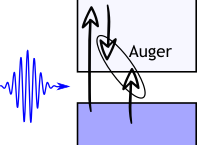

In [45]:
PCE_lost = np.array(pd.read_table("data/MEG.csv", sep=',', header=0))

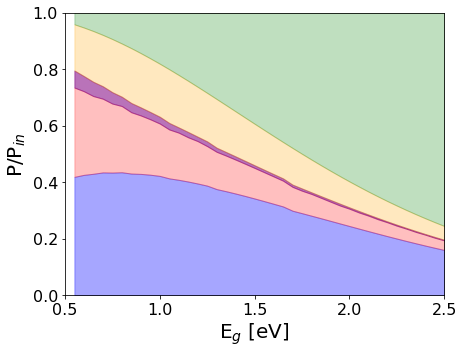

In [46]:
filename = '4-excitons-multiples'
fig, ax = plt.subplots(figsize=figSize)
Col_lost = PCE_lost[:,1] + PCE_lost[:,5]
Rad_lost = Col_lost + PCE_lost[:,4]
Th_lost  = Rad_lost + PCE_lost[:,3]
Abs_lost = Th_lost + PCE_lost[:,2]
ax.fill_between(PCE_lost[:,0],  PCE_lost[:,1], 0, color='blue', alpha=0.350, label ='Convertie')
ax.fill_between(PCE_lost[:,0],  Col_lost, PCE_lost[:,1], color='red', alpha=0.25, label ='Collectée')
ax.fill_between(PCE_lost[:,0],  Rad_lost , Col_lost , color='purple', alpha=0.55, label ='Recombinée')
ax.fill_between(PCE_lost[:,0],  Th_lost , Rad_lost , color='orange', alpha=0.25, label ='Thermalisée')
ax.fill_between(PCE_lost[:,0],  Abs_lost, Th_lost, color='green', alpha=0.25, label ='Non absorbée')
ax.set_ylim(0, 1.)
ax.set_xlim(0.5, 2.5)

setLayout(dictPlotParams,xLabel=xLabel,yLabel=yLabel)

savePlot(foldSaveFig,filename)